In [2]:
import pandas as pd
donnees_techniques = pd.read_csv("D:/Formations/Data analysis Python/Data/RT_donnees_techniques_Par_Tch.csv")

In [3]:
donnees_techniques.head()

,Departement,Commune,Nom_AEV,No_AEV,Type_AEV_,Arrondissement,Village,Localite,Nom_Local,Indice_IRH,...,Compteur,Manometre,Tamis,SONEB,Etat_AEV,Expr1004,Expr1005,A_Ouvrage_Id.Info_Programme,Hauteur_Margelle,Debit_Fin_Foration
0,BORGOU,TCHAOUROU,NaN,NaN,NaN,ALAFIAROU,KODA,Koda,Patanti,SAV-A-0016-04,...,FAUX,FAUX,FAUX,FAUX,NaN,PNUD,PNUD,NaN,0,1.33
1,BORGOU,TCHAOUROU,NaN,NaN,NaN,BETEROU,BANIGRI,Banigri,BANIGRI,INC-C-0130-04,...,FAUX,FAUX,FAUX,FAUX,NaN,PNUD,UNICEF,NaN,0,0.00
2,BORGOU,TCHAOUROU,NaN,NaN,NaN,ALAFIAROU,KOKO,Koko,KOKO GBEROUKPANIN,PAR-C-0254-04,...,FAUX,FAUX,FAUX,FAUX,NaN,SUISSE,BEST SD ASEHA,NaN,0,0.00
3,BORGOU,TCHAOUROU,NaN,NaN,NaN,ALAFIAROU,KOKO,Ayégourou,Ayégourou,PAR-C-0189-04,...,FAUX,FAUX,FAUX,FAUX,NaN,CEAO,CEAO II,NaN,0,0.00
4,BORGOU,TCHAOUROU,NaN,NaN,NaN,ALAFIAROU,KOKO,Koko,Koko,PAR-C-0177-04,...,FAUX,FAUX,FAUX,FAUX,NaN,DANEMARK,DANIDA,NaN,0,0.00


In [4]:
print(donnees_techniques.columns)

Index(['Departement', 'Commune', 'Nom_AEV', 'No_AEV', 'Type_AEV_',
       'Arrondissement', 'Village', 'Localite', 'Nom_Local', 'Indice_IRH',
       'Hors_Parc', 'Ouvrage_Positif', 'Usage_Ouvrage', 'Type_Ouvrage',
       'Type_SE', 'etat_ouvrage', 'Perennite', 'Propriete_Ouvrage',
       'DateCreat', 'DateModif', 'Categorie', 'No_Localite', 'Pop_Ajustee',
       'Annee_Actuelle', 'Autre_Nom', 'Id_Financement', 'Id_Programme',
       'A_Ouvrage_Id.Entreprise', 'Annee_Fin', 'Type_Exhaure',
       'Id_Unite_Hydro', 'Nom Unité hydro', 'Longitude', 'Latitude', 'xCoord',
       'yCoord', 'Prof_Totale', 'Prof_Toit', 'Prof_Mur', 'Lithologie',
       'Date_Foration', 'Prof_Equipee', 'Prof_Sup_Crep', 'Longueur_Crep',
       'Prof_Inf_Crep', 'Geomorphologie', 'Date_Dvpt', 'Debit_Dvpt',
       'Niv_Statique', 'Date_Niveau', 'Debit_Exploitable', 'Debit_Equipe',
       'rqtListe_Pompe.Modele_Pompe', 'rqtListe_Pompe.Cote_Install',
       'Date_Essai', 'Conductivite', 'Potabilite', 'A_Pmotor.Info_Prog

In [5]:
donnees_techniques["Prof_Totale"].describe()

count      490.000000
mean      2667.390327
std       9623.959046
min          7.500000
25%         43.127500
50%         55.130000
75%         63.575000
max      39567.000000
Name: Prof_Totale, dtype: float64

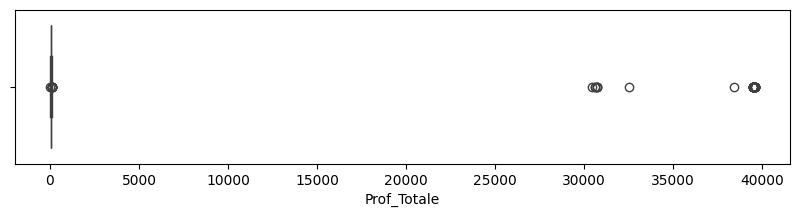

In [6]:
#Réalisation d'un boxblot pour la visualisation des données de profondeur totale
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=donnees_techniques['Prof_Totale'])
plt.show()

L’analyse statistique des profondeurs totales met en évidence une distribution fortement dissymétrique, caractérisée par la présence de plusieurs valeurs aberrantes significatives. Ces dernières se manifestent par des points éloignés du reste de l’échantillon, dépassant largement les limites supérieures définies par l’intervalle interquartile. Cette dispersion indique une hétérogénéité marquée des profondeurs relevées, pouvant résulter soit de contextes géologiques très variés, soit d’erreurs potentielles de mesure ou de saisie. Dans le cas de cette étude, il s'agit d'erreurs de saisie. En effet, d'après la littérature, les forages en zone de socle au Bénin dépassent rarement les 100 m de profondeur. Il faut donc supprimer les valeurs aberrantes en tenant compte de cela. Nous allons utiliser dans un premier temps, la méthode du calcul des quartiles. 

In [7]:
#Supprimer les valeurs manquantes
prof_totale_clean = donnees_techniques['Prof_Totale'].dropna()

#Calcul des quartiles
Q1 = prof_totale_clean.quantile(0.25)
Q3 = prof_totale_clean.quantile(0.75)
IQR = Q3 - Q1

#Définition des bornes
borne_min = Q1 - 1.5 * IQR
borne_max = Q3 + 1.5 * IQR

print(f"Borne min : {borne_min:.2f}, Borne max : {borne_max:.2f}")

Borne min : 12.46, Borne max : 94.25


In [8]:
#Filtrer les données valides
prof_totale_valide = prof_totale_clean[(prof_totale_clean >= borne_min) & (prof_totale_clean <= borne_max)]

In [9]:
prof_totale_valide.describe()

count    447.000000
mean      53.380671
std       12.576389
min       23.000000
25%       43.000000
50%       54.000000
75%       61.365000
max       91.150000
Name: Prof_Totale, dtype: float64

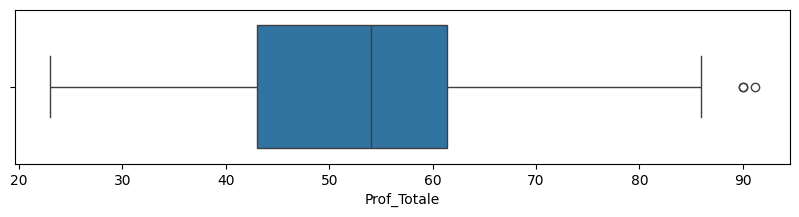

In [10]:
#Vsualisation des données de profondeur totale aorès la suppression des valeurs aberrantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=prof_totale_valide)
plt.show()

In [11]:
#Vérification des valeurs aberrantes supprimées
valeurs_aberrantes = prof_totale_clean[(prof_totale_clean < borne_min) | (prof_totale_clean > borne_max)]

# Affichage
print(f"Nombre de valeurs aberrantes : {len(valeurs_aberrantes)}")
print(valeurs_aberrantes)

Nombre de valeurs aberrantes : 43
22     39527.00
23     39525.00
94     39566.00
99     30596.00
125    39567.00
135    30694.00
155    39540.00
199    39523.00
204       98.00
304    30460.00
366    32486.00
485    39477.00
495    39534.00
506    38398.00
518    39564.00
521        7.50
543    39561.00
553    39560.00
604    30602.00
617      100.00
622      116.15
625      103.80
626      103.80
653       97.85
654      120.00
655      100.00
666    30725.00
723    39474.00
752    39564.00
841    30727.00
848    39539.00
874    39566.00
875    39535.00
881    39482.00
893    39531.00
906    39529.00
914    39532.00
916    39533.00
941    39480.00
942    39478.00
943    39479.00
967    39478.00
968    39481.00
Name: Prof_Totale, dtype: float64


Cette méthode a permis d'obtenir des valeurs de profondeurs de forages variant entre 23 m et 91.15 m. Bien que ces valeurs soient représentatives des profondeurs des forages en zone de socle au Bénin, on remarque que la méthode utilisée a supprimé de nombreuses valeurs pertinentes pour l'étude comme 98 m. En plus, sur la zone d'étude, il existe bien quelques forages ayant des profondeurs au-delà de 100 m. Pour l'étude, nous allons garder ces forages.

In [12]:
valeurs_extremes = valeurs_aberrantes[valeurs_aberrantes > 120][valeurs_aberrantes < 10] 
valeurs_suspectes_basses = valeurs_aberrantes[valeurs_aberrantes <= 150][valeurs_aberrantes >= 10]

In [13]:
# Reconstituer la série
prof_totale_corrigee = pd.concat([prof_totale_valide, valeurs_suspectes_basses]).sort_index()

In [14]:
prof_totale_corrigee.describe()

count    455.000000
mean      54.287385
std       14.231042
min       23.000000
25%       43.020000
50%       54.500000
75%       61.435000
max      120.000000
Name: Prof_Totale, dtype: float64

L'étude consiste à connaitre le nombre de forages en fonction des profondeurs. Pour le faire, les profondeurs seront mises en classes. Afin de déterminer le nombre de classes, la formule utilisée est celle de Sturges (1926) : C = 1 + 3,3 log (n) C : nombre de classes  n : taille de l’échantillon (l’effectif). Pour ce qui est de l'intervale des classes, la formule utilisée est I = (𝑋𝑚𝑎𝑠−𝑋𝑚𝑖n)/C

In [15]:
import numpy as np

n = len(prof_totale_corrigee)

C = int(1 + 3.3 * np.log10(n))

print(f"Nombre de classes (Sturges) : {C}")

Nombre de classes (Sturges) : 9


In [16]:
xmin = prof_totale_corrigee.min()
xmax = prof_totale_corrigee.max()

I = (xmax - xmin) / C

print(f"Amplitude des classes : {I:.2f}")

Amplitude des classes : 10.78


In [17]:
# Détermination des bornes des classes
bornes_classes = np.arange(xmin, xmax + I, I)

# Affichage des intervalles
classes = []
for i in range(len(bornes_classes) - 1):
    classes.append(f"[{bornes_classes[i]:.2f} – {bornes_classes[i+1]:.2f}[")  # intervalle semi-ouvert

print("Liste des classes :")
for c in classes:
    print(c)

Liste des classes :
[23.00 – 33.78[
[33.78 – 44.56[
[44.56 – 55.33[
[55.33 – 66.11[
[66.11 – 76.89[
[76.89 – 87.67[
[87.67 – 98.44[
[98.44 – 109.22[
[109.22 – 120.00[


In [18]:
# Histogramme : counts = effectif, bin_edges = bornes
counts, bin_edges = np.histogram(prof_totale_corrigee, bins=bornes_classes)

# Nombre total de forages
total = counts.sum()

# Affichage des classes et effectifs
print("Liste des classes avec pourcentages :\n")
for i in range(len(counts)):
    pourcentage = (counts[i] / total) * 100
    print(f"[{bin_edges[i]:.2f} – {bin_edges[i+1]:.2f}[ : {counts[i]} valeurs ({pourcentage:.1f}%)")

Liste des classes avec pourcentages :

[23.00 – 33.78[ : 22 valeurs (4.8%)
[33.78 – 44.56[ : 107 valeurs (23.5%)
[44.56 – 55.33[ : 124 valeurs (27.3%)
[55.33 – 66.11[ : 126 valeurs (27.7%)
[66.11 – 76.89[ : 51 valeurs (11.2%)
[76.89 – 87.67[ : 14 valeurs (3.1%)
[87.67 – 98.44[ : 5 valeurs (1.1%)
[98.44 – 109.22[ : 4 valeurs (0.9%)
[109.22 – 120.00[ : 2 valeurs (0.4%)


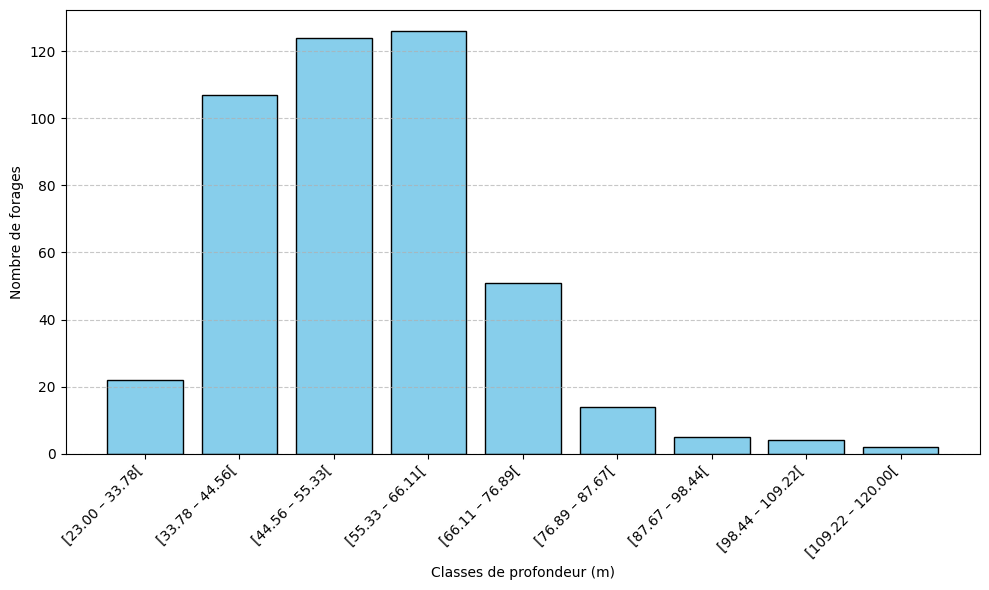

In [19]:
# Création des étiquettes de classes pour l'axe x
etiquettes_classes = [f"[{bin_edges[i]:.2f} – {bin_edges[i+1]:.2f}[" for i in range(len(counts))]

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(etiquettes_classes, counts, color='skyblue', edgecolor='black')

plt.xlabel("Classes de profondeur (m)")
plt.ylabel("Nombre de forages")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

L'étude montre que les forages de Parakou et de Tchaourou ont des pronfondeurs qui varient majoritairement (près de 60%) entre 45 m et 67 m. Cela correspond aux travaux de Vouillamouz et al, 2015 qui ont trouvé que sur la zone de socle béninoise, 50% des forages positifs ont une profondeur qui se trouve entre 43 et 60 m.

In [20]:
#Exportation des altération corrigées vers un csv
prof_totale_corrigee.to_csv("D:/Formations/Data analysis Python/Data/profondeur.csv", index=False)